### 목표설정
- 손글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 선형 분류모델의 불확실성을 확인
- 이미지 데이터의 형태를 이해

### 데이터 수집

In [26]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [27]:
digit = pd.read_csv('./data/digit_train.csv')
digit.head()

# label은 숫자로 분류가 되고 있음 => 정답 데이터라는 것을 알 수 있다.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
digit.shape

(42000, 785)

### 데이터 전처리(생략)
- 학습용 데이터라서 이미 깔끔하게 전처리가 되어있음

### 탐색적 데이터 분석(EDA)

In [29]:
# 하나의 데이터를 가져와보자
img0 = digit.iloc[ 5,1:786 ]
img0

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 5, Length: 784, dtype: int64

In [30]:
print(min(img0)) # 최소값 0
print(max(img0)) # 최대값 255


0
255


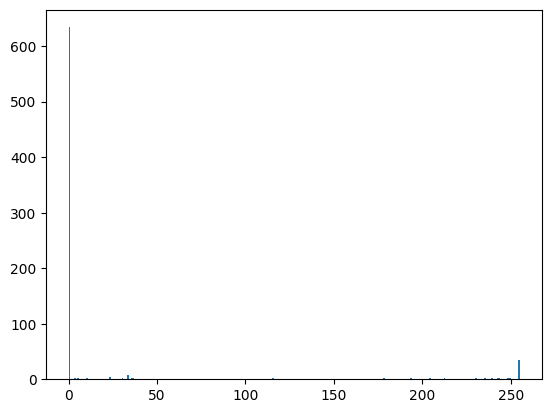

In [31]:
# 히스토그램으로 데이터의 분포를 한번 확인해보자
plt.hist(img0,bins = 255)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

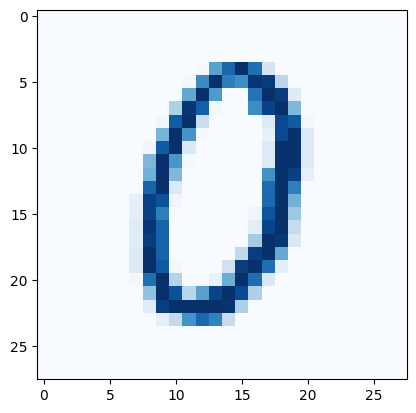

In [32]:
# 실제 데이터 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap = 'Blues')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

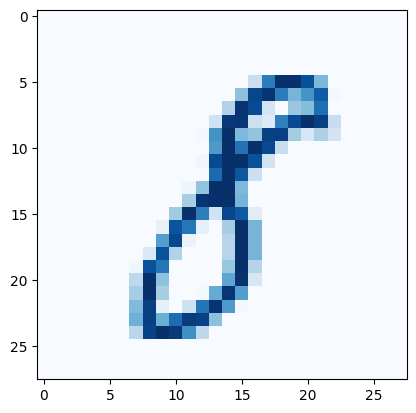

In [33]:
# 하나의 데이터를 가져와보자
img0 = digit.iloc[ 5000,1:786 ]
img0
# 실제 데이터 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap = 'Blues')
plt.show

### 데이터 5000장 추출

In [34]:
# 각 데이터 5000개씩 추출
X = digit.iloc[ :5000 , 1: ]
y = digit.iloc[ : 5000, 0]

In [35]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [37]:
# train_test_split 이용 데이터 분할(test_size = 30% , random_state = 7)
# 변수의 순서 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 784)
(3500,)
(1500, 784)
(1500,)


### 모델링
- KNN
- Decision Tree
- Logistic Regression
- Random Forest 
  
  사용해볼 예정

In [39]:
# model import(KNN, DT, Logi, RF, 교차검증 모델)
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.tree import DecisionTreeClassifier # tree 분류(가지를 치니까 tree)
from sklearn.ensemble import RandomForestClassifier # 분류모델 - 랜덤 포레스트
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [40]:
# 모델생성
knn = KNeighborsClassifier() 
dt = DecisionTreeClassifier()
logi = LogisticRegression()
rf = RandomForestClassifier()

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
# 교차검증(데이터는 train셋 이용, 5등분 할 것)
# cross_val_score(모델명, 문제데이터, 정답데이터, cv = 데이터를 나눠줄 값)
knn_rs = cross_val_score(knn,X_train,y_train, cv =5 ).mean()
tree_rs = cross_val_score(dt,X_train,y_train, cv =5 ).mean()
logi_rs = cross_val_score(logi,X_train,y_train, cv =5 ).mean()
rf_rs = cross_val_score(rf,X_train,y_train, cv =5 ).mean()

In [50]:
print('knn교차검증 : ',knn_rs)
print('결정나무교차검증 : ',tree_rs)
print('로지회귀교차검증 : ',logi_rs)
print('랜포교차검증 : ',rf_rs)

knn교차검증 :  0.9185714285714285
결정나무교차검증 :  0.7371428571428572
로지회귀교차검증 :  0.8754285714285717
랜포교차검증 :  0.928857142857143


- 데이터 스케일링
  - 왜 해주는가? => 랜덤포레스트/트리모델은 스케일링이 그닥 필요가 없음
  - 거리기반 모델인 KNN과 Logistic회귀에서 좀 더 나은 성능을 기대할 수 있다.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# 스케일러 객체 생성
mm_scaler = MinMaxScaler()

In [55]:
mm_scaler.fit(X_train)

MinMaxScaler()

In [57]:
# 스케일러 적용
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

(array([570.,  16.,  11.,   8.,   6.,  20.,  15.,   8.,  11., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

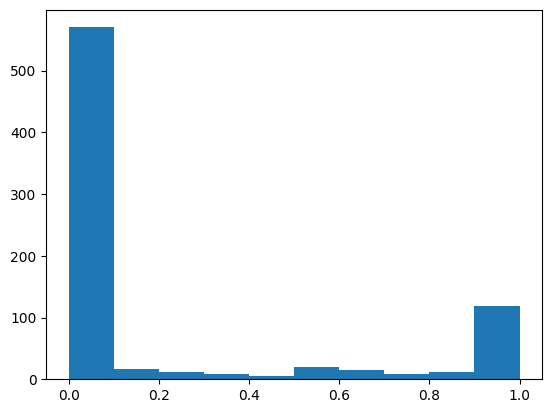

In [58]:
plt.hist(X_train_scaled[0])

In [62]:
### 스케일링 된 데이터를 이용해서 거리기반 모델의 교차 검증 실시!
print(cross_val_score(knn,X_train_scaled,y_train,cv = 5).mean())
# knn교차검증 :  0.9185714285714285
print(cross_val_score(logi,X_train_scaled,y_train,cv = 5).mean())
# 로지회귀교차검증 :  0.8754285714285717

0.9179999999999999
0.8960000000000001


## test 데이터 확인 

In [63]:
knn.fit(X_train_scaled,y_train)
dt.fit(X_train,y_train)
logi.fit(X_train_scaled,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
# score 함수를 이용해서 f1스코어 확인해기(test 데이터 셋)
print(knn.score(X_test_scaled,y_test))
print(dt.score(X_test,y_test))
print(logi.score(X_test_scaled,y_test))
print(rf.score(X_test,y_test))

0.9113333333333333
0.746
0.8846666666666667
0.926


In [65]:
# score 함수를 이용해서 f1스코어 확인해기(train 데이터 셋)
print(knn.score(X_train_scaled,y_train))
print(dt.score(X_train,y_train))
print(logi.score(X_train_scaled,y_train))
print(rf.score(X_train,y_train))

0.9554285714285714
1.0
0.9957142857142857
1.0


## 분류모델의 예측 불확실성 확인하기

In [67]:
# predict_proba() : 예측값이 어떻게 도출이 되었는지 확률정보로 표시해주는 기능
knn.predict_proba(X_test[50 : 80])  # X_test의 일부분만 잘라서 넣어줄꺼임

array([[0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0.2, 0.2],
       [0.2, 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.6, 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. ],
       [0.2, 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0.2, 0. , 0.2, 0.4, 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.4, 0.2, 0. , 0.2, 0. , 0.2],
       [0. , 0. , 0.4, 0. , 0. , 0.2, 0.2, 0. , 0. , 0.2],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

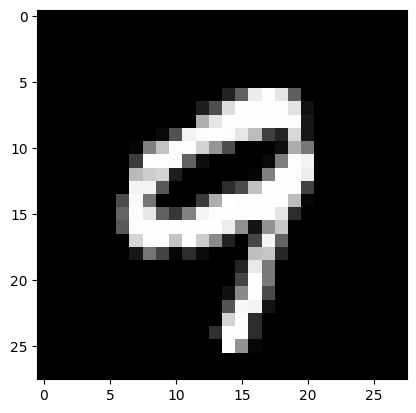

In [72]:
img1 = X_test.iloc[50]
plt.imshow(img1.values.reshape(28,28),cmap = "gray")
plt.show()